# **Import Libraries**


In [60]:
#import libraries
from matplotlib import pyplot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline

# **Import and warehouse data:**

In [61]:
#Get dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Import all the given datasets
#read Part1-Normal CSV file as a dataframe
df_1 = pd.read_csv (r'/content/drive/MyDrive/project_Part/Part-1/Part1 - Normal.csv')
print (df_1.head())

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal


In [63]:
#read Part1-Type_H CSV file as a dataframe
df_2 = pd.read_csv (r'/content/drive/MyDrive/project_Part/Part-1/Part1 - Type_H.csv')
print (df_2.head())

   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H


In [64]:
#read Part1-Type_S CSV file as a dataframe
df_3 = pd.read_csv (r'/content/drive/MyDrive/project_Part/Part-1/Part1 - Type_S.csv')
print (df_3.head())

   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S


In [65]:
# explore shape and size of each dataset
print(df_1.size)
print(df_1.shape)

700
(100, 7)


In [66]:
print(df_2.size)
print(df_2.shape)

420
(60, 7)


In [67]:
print(df_3.size)
print(df_3.shape)

1050
(150, 7)


In [68]:
#Merge all datasets onto one and explore final shape and size.
result1 = df_1.append(df_2)
df = result1.append(df_3)

In [69]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [70]:
print(df.size)
print(df.shape)

2170
(310, 7)


In [71]:
#Data summary
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [72]:
# Explore and if required correct the datatypes of each attribute
df["Class"].replace({"Nrmal": "Normal", "tp_s": "Type_S", "type_h": "Type_H"}, inplace=True)

In [73]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


# **Data cleansing:**


In [74]:
#Explore and if required correct the datatypes of each attribute 
df.iloc[:,0:5].apply(pd.to_numeric)

,P_incidence,P_tilt,L_angle,S_slope,P_radius
0,38.505273,16.964297,35.112814,21.540976,127.632875
1,54.920858,18.968430,51.601455,35.952428,125.846646
2,44.362490,8.945435,46.902096,35.417055,129.220682
3,48.318931,17.452121,48.000000,30.866809,128.980308
4,45.701789,10.659859,42.577846,35.041929,130.178314
...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624
146,95.480229,46.550053,59.000000,48.930176,96.683903
147,74.094731,18.823727,76.032156,55.271004,128.405731
148,87.679087,20.365613,93.822416,67.313473,120.944829


In [75]:
#Explore for null values in the attributes and if required drop or impute values. 
df.isnull().values.any()

False

# **Data analysis & visualisation**

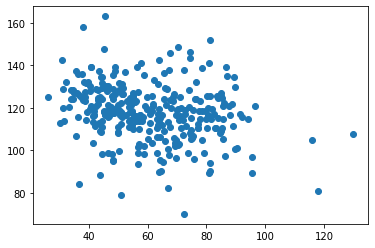

In [76]:
#Perform detailed statistical analysis on the data
z = df["Class"].replace(('Type_S', 'Type_H', 'Normal'), (2, 1, 0), inplace=True)
plt.scatter(df.iloc[:, 0], df.iloc[:, 4], c=z, cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


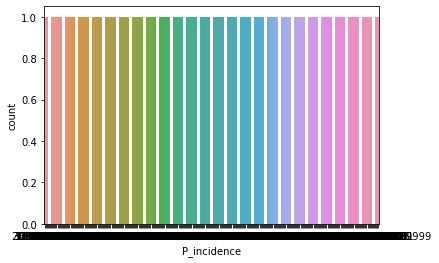

In [77]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis
sns.countplot(df['P_incidence'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


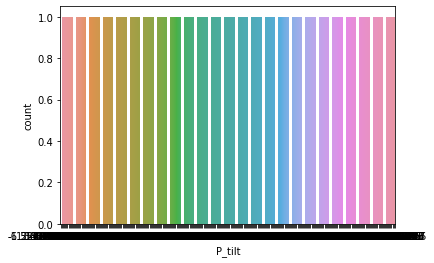

In [78]:
sns.countplot(df['P_tilt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


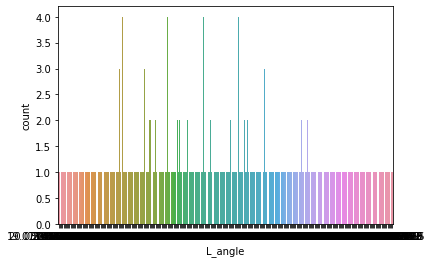

In [79]:
sns.countplot(df['L_angle'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


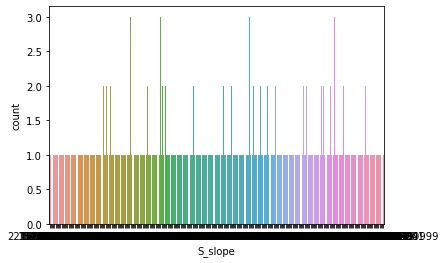

In [80]:
sns.countplot(df['S_slope'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


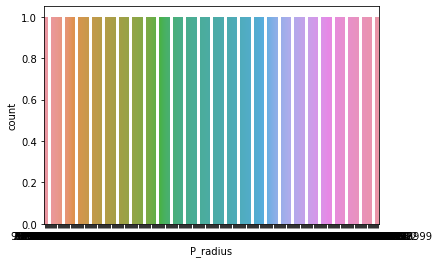

In [81]:
sns.countplot(df['P_radius'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


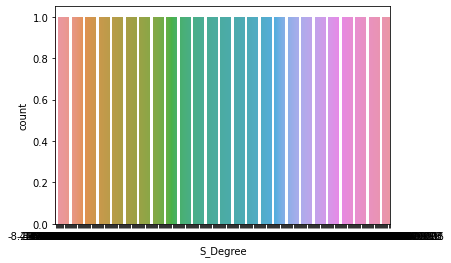

In [82]:
sns.countplot(df['S_Degree'])

In [83]:
import plotly.graph_objs as go
import plotly.express as px
fig = px.violin(df, df["Class"],box=True,points='all')
fig.show()

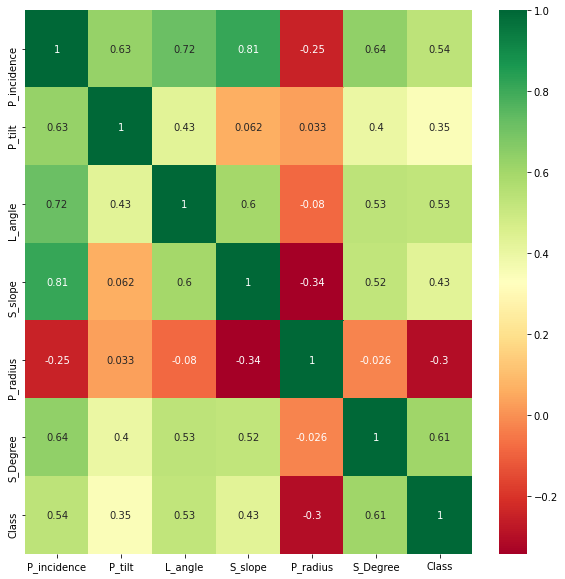

In [84]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="RdYlGn")

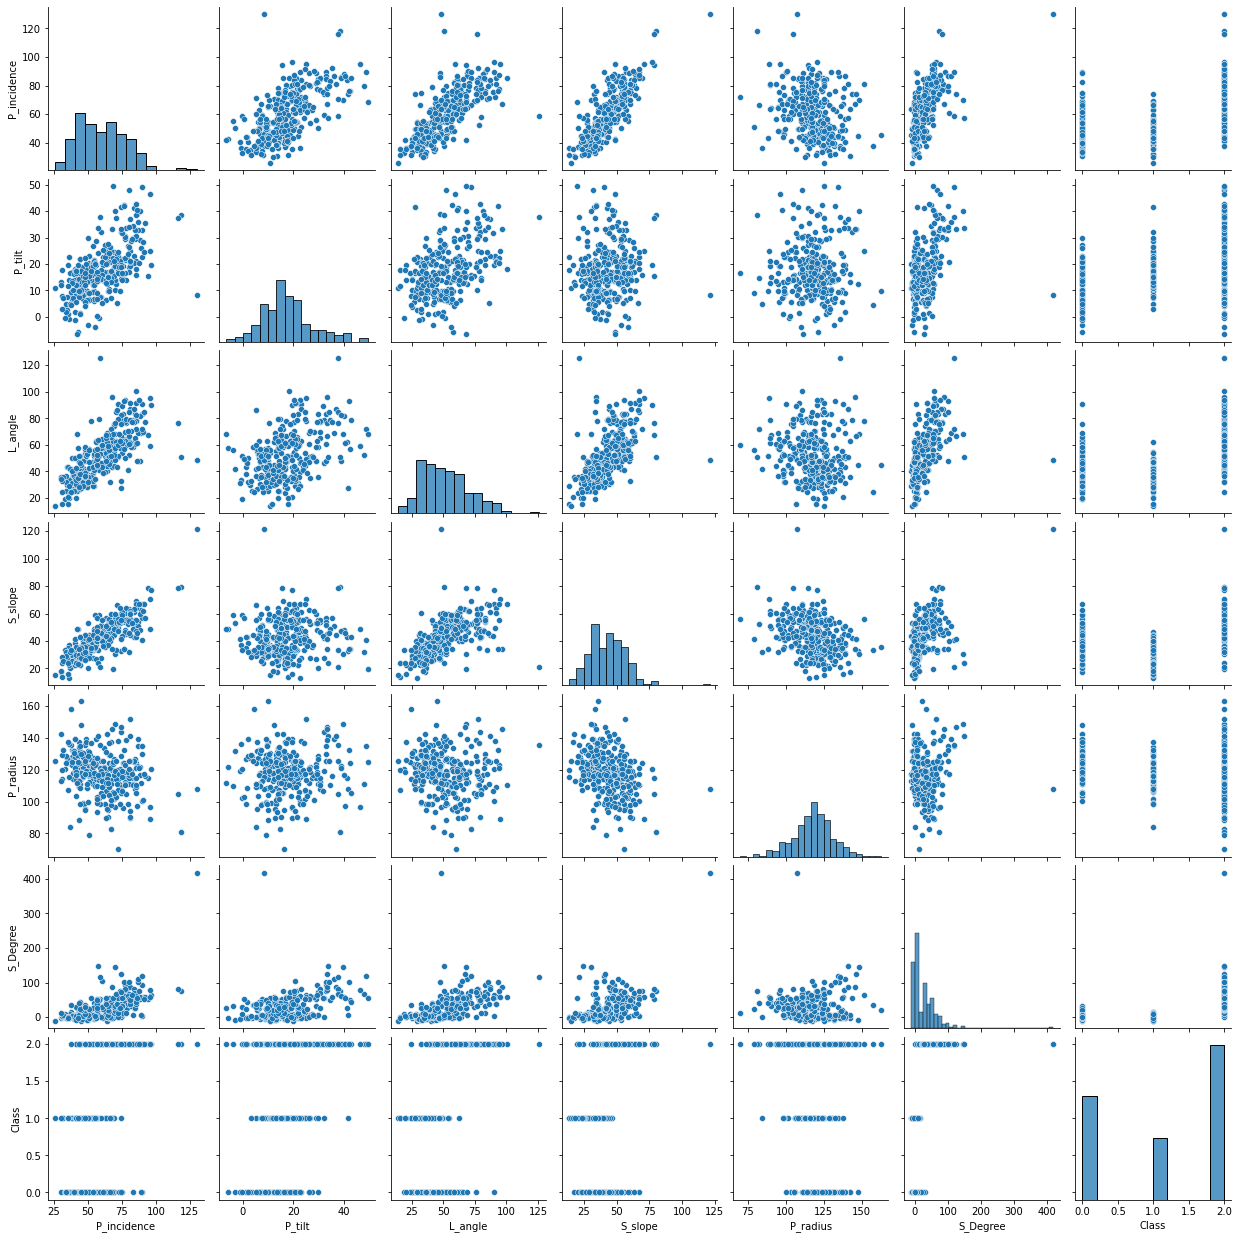

In [85]:
import seaborn as sns
sns.pairplot(df)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr

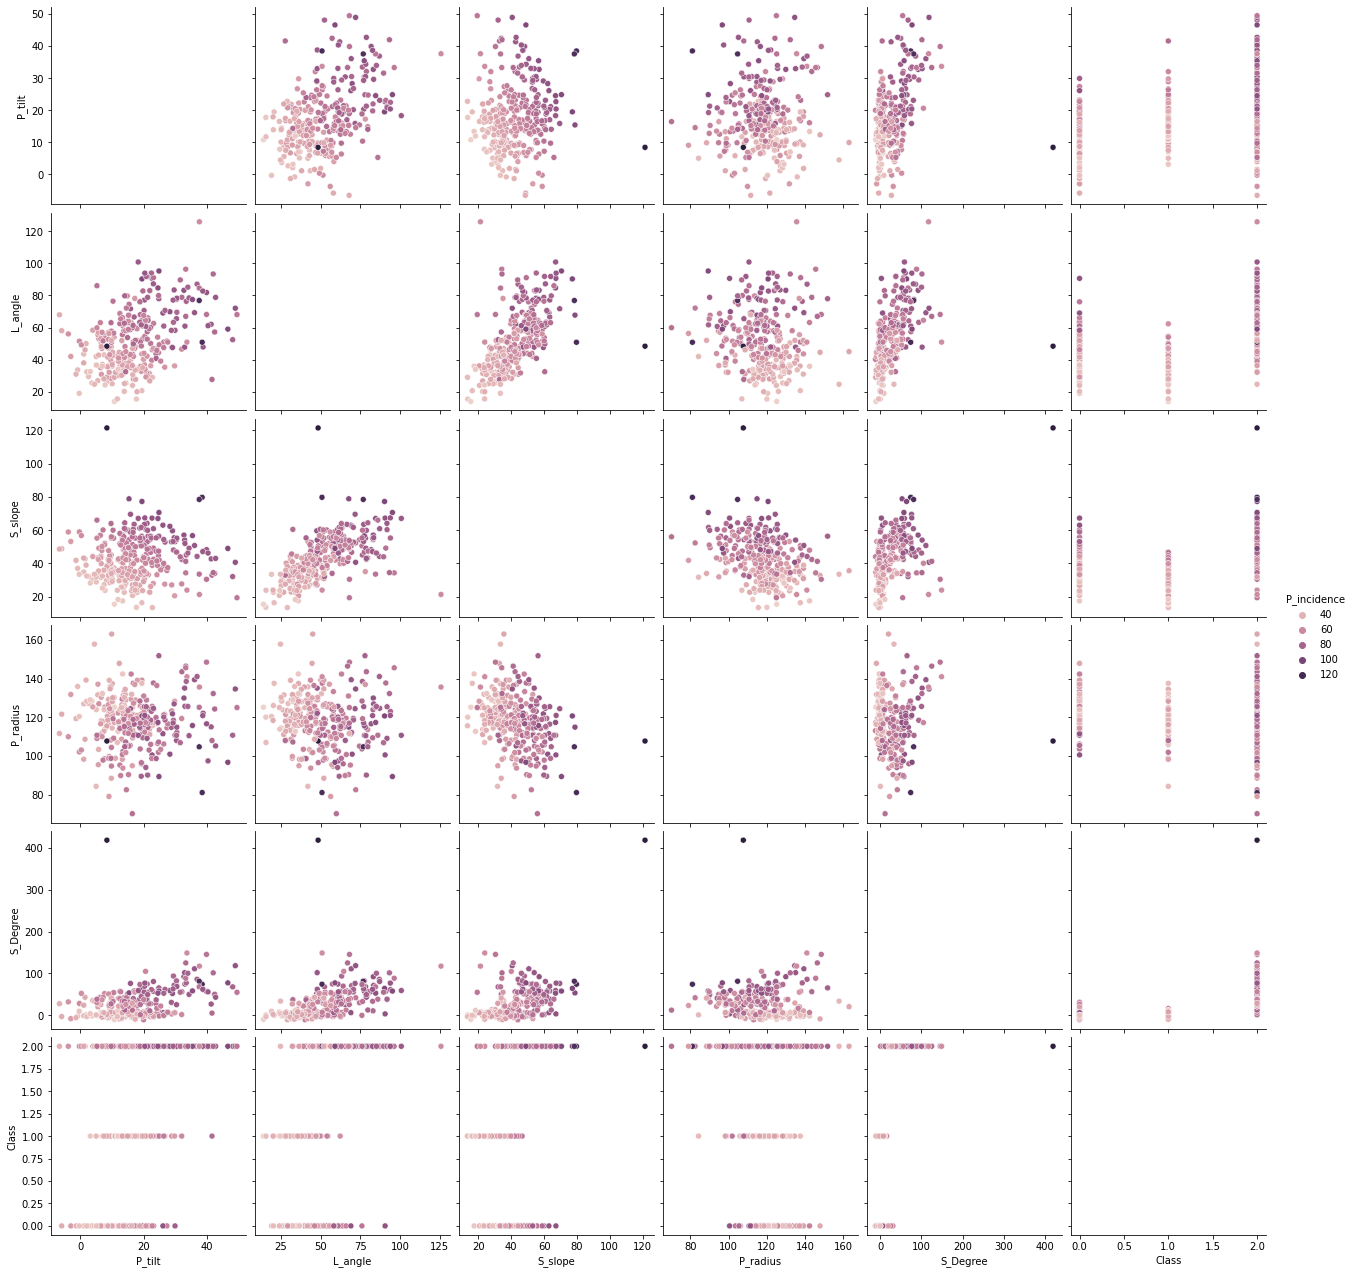

In [86]:
sns.pairplot(df, hue = 'P_incidence', size=3)

# **Data pre-processing:** 

In [87]:
#Segregate predictors vs target attributes 
y = df['Class']
X = df.drop('Class', axis=1)

In [89]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 310, dtype: int64

In [91]:
#Normalize the data
def normalization(input_data):
    minimum = np.amin(input_data, axis=0)
    maximum = np.amax(input_data, axis=0)
    normalized_data = (input_data - minimum)/(maximum - minimum)
    return normalized_data

In [92]:
normalization(X)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.119180,0.420085,0.188942,0.075642,0.618897,0.044331
1,0.277500,0.455882,0.336501,0.209004,0.599688,0.030400
2,0.175670,0.276858,0.294446,0.204049,0.635973,0.037366
3,0.213828,0.428799,0.304271,0.161942,0.633388,0.023620
4,0.188587,0.307480,0.255748,0.200578,0.646271,0.017852
...,...,...,...,...,...,...
145,0.520452,0.723338,0.636299,0.303548,0.596967,0.259195
146,0.668675,0.948527,0.402712,0.329098,0.286071,0.205635
147,0.462423,0.453297,0.555135,0.387776,0.627209,0.196569
148,0.593437,0.480838,0.714343,0.499216,0.546974,0.204350


In [93]:
#Perform train-test split. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=6)

# **Model training, testing and tuning:**

In [94]:
# Design and train a KNN classifier.
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# classification accuracies for train and test data.  
for i in range(20):
  i = i+1
  clf = KNeighborsClassifier(n_neighbors=i) 
  clf.fit(X_train, y_train)
  print('Accuracy for the value of k= ' , i , 'is:', clf.score(X_test, y_test))

Accuracy for the value of k=  1 is: 0.8640776699029126
Accuracy for the value of k=  2 is: 0.8349514563106796
Accuracy for the value of k=  3 is: 0.8640776699029126
Accuracy for the value of k=  4 is: 0.8737864077669902
Accuracy for the value of k=  5 is: 0.8640776699029126
Accuracy for the value of k=  6 is: 0.8543689320388349
Accuracy for the value of k=  7 is: 0.8737864077669902
Accuracy for the value of k=  8 is: 0.8640776699029126
Accuracy for the value of k=  9 is: 0.8640776699029126
Accuracy for the value of k=  10 is: 0.8543689320388349
Accuracy for the value of k=  11 is: 0.8543689320388349
Accuracy for the value of k=  12 is: 0.8543689320388349
Accuracy for the value of k=  13 is: 0.8640776699029126
Accuracy for the value of k=  14 is: 0.883495145631068
Accuracy for the value of k=  15 is: 0.8737864077669902
Accuracy for the value of k=  16 is: 0.8737864077669902
Accuracy for the value of k=  17 is: 0.8640776699029126
Accuracy for the value of k=  18 is: 0.8737864077669902
Ac

In [96]:
#import required libraries
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5573864114332941
RMSE value for k=  2 is: 0.4542143542554005
RMSE value for k=  3 is: 0.4294950749630032
RMSE value for k=  4 is: 0.36949847931160995
RMSE value for k=  5 is: 0.3407587194106248
RMSE value for k=  6 is: 0.3357517447288359
RMSE value for k=  7 is: 0.32588602913068226
RMSE value for k=  8 is: 0.3207053815382162
RMSE value for k=  9 is: 0.3174949896307167
RMSE value for k=  10 is: 0.3169943799079155
RMSE value for k=  11 is: 0.3194716009715557
RMSE value for k=  12 is: 0.3249346461549532
RMSE value for k=  13 is: 0.32653295705905205
RMSE value for k=  14 is: 0.3398008717689284
RMSE value for k=  15 is: 0.3445366477141771
RMSE value for k=  16 is: 0.33904268067661975
RMSE value for k=  17 is: 0.33204867733106713
RMSE value for k=  18 is: 0.3373987966492216
RMSE value for k=  19 is: 0.3427826319476721
RMSE value for k=  20 is: 0.3373224092274189


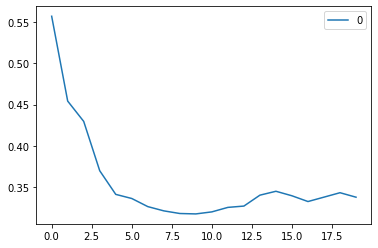

In [97]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# **Conclusion and improvisation:** 
From the above KNN model we got the 89% accuracy with value of K=20. As the value of K increases, the accuracy increases but it doesn't make any sense. In order to improve accuracy, we have to get more data for training. There are many more algorithms which can train the model based on both similarities and dissimilarities. As per my knowledge, GLVQ and it's variants provide the good result for this supervised learning problem.